# Assignment 1 - Tesla

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)

In [15]:
tesla = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [16]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1154 entries, 2020-01-31 to 2024-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1154 non-null   float64
 1   High       1154 non-null   float64
 2   Low        1154 non-null   float64
 3   Close      1154 non-null   float64
 4   Adj Close  1154 non-null   float64
 5   Volume     1154 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.1 KB


In [17]:
print(tesla.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-31  42.666668  43.533333  42.167999  43.371334  43.371334  235789500
2020-02-03  44.912666  52.409332  44.901333  52.000000  52.000000  705975000
2020-02-04  58.863998  64.599335  55.591999  59.137333  59.137333  914082000
2020-02-05  54.883999  56.398666  46.940666  48.980000  48.980000  726357000
2020-02-06  46.661331  53.055332  45.799999  49.930668  49.930668  598212000


## 1) Visualize the stock price history from Jan1,2020 to Aug31, 2024
### Plot the stock price history (Open, Close, High, Low) and volume

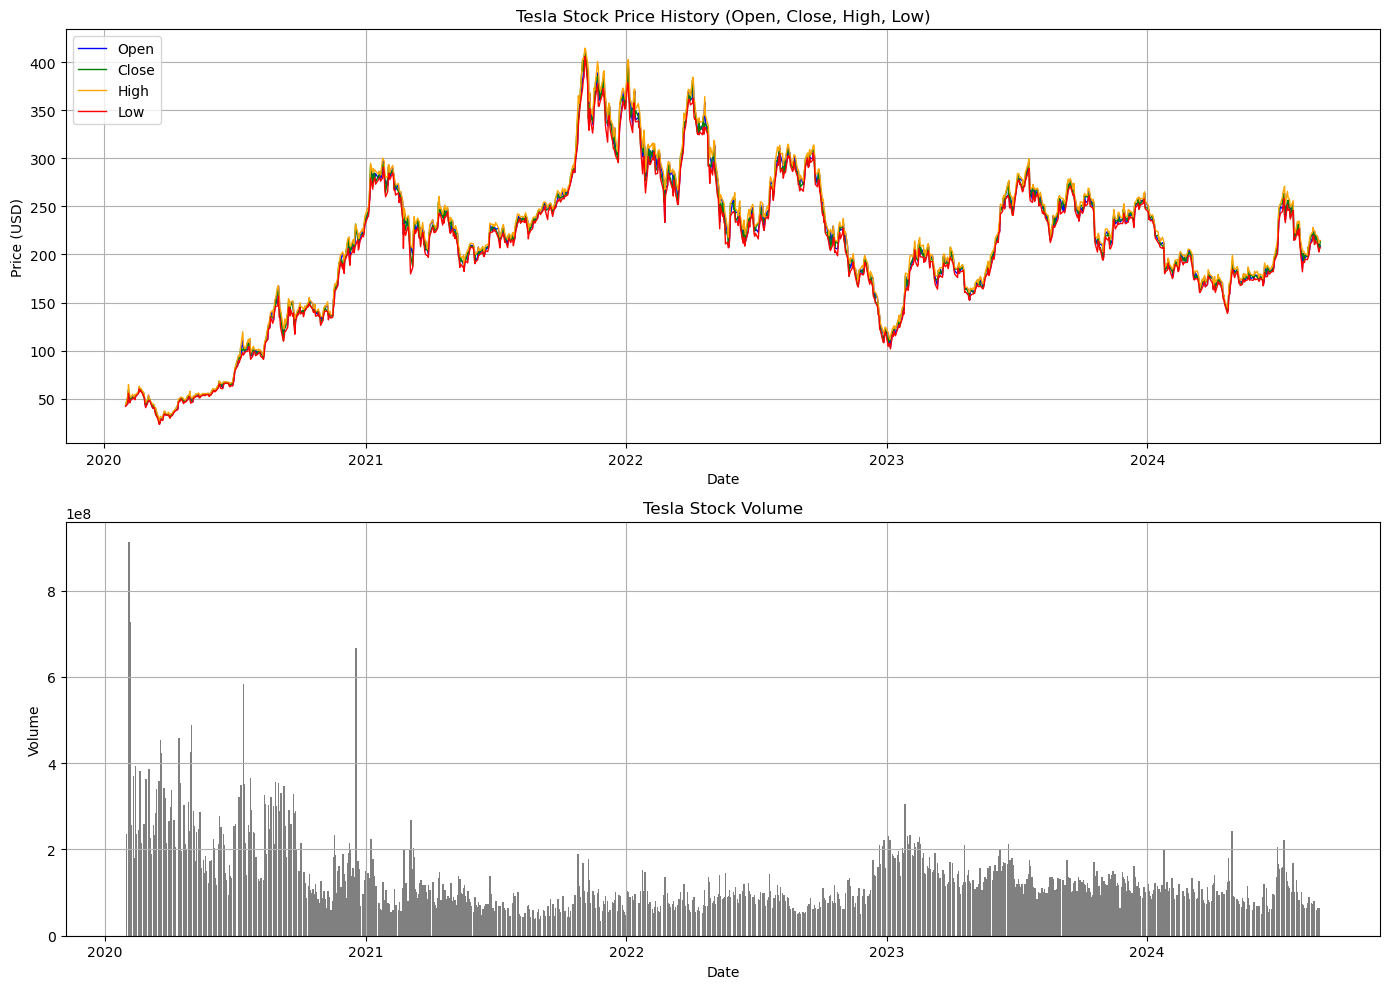

In [19]:
plt.figure(figsize=(14, 10))
# Plot Open, Close, High, Low
plt.subplot(2, 1, 1)
plt.plot(tesla.index, tesla['Open'], label='Open', color='blue', linewidth=1)
plt.plot(tesla.index, tesla['Close'], label='Close', color='green', linewidth=1)
plt.plot(tesla.index, tesla['High'], label='High', color='orange', linewidth=1)
plt.plot(tesla.index, tesla['Low'], label='Low', color='red', linewidth=1)
plt.title('Tesla Stock Price History (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)

# Plot Volume
plt.subplot(2, 1, 2)
plt.bar(tesla.index, tesla['Volume'], color='gray', width=2)
plt.title('Tesla Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

plt.tight_layout()
plt.show()

## 2) Find 3 competitors and visualise their stock price history in the same time period

### Competitors chosen - BMW, NIO and BYD

[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                       Close             \
Ticker                        BMW.DE        BYD   NIO     BMW.DE        BYD   
Date                                                                          
2020-01-02 00:00:00+00:00  54.129692  29.168081  3.72  74.220001  30.049999   
2020-01-03 00:00:00+00:00  53.473309  28.808945  3.83  73.320000  29.680000   
2020-01-06 00:00:00+00:00  53.276394  28.857473  3.68  73.050003  29.730000   
2020-01-07 00:00:00+00:00  54.129692  28.663345  3.24  74.220001  29.530001   
2020-01-08 00:00:00+00:00  54.268261  28.915714  3.39  74.410004  29.790001   

Price                                 High                         Low  \
Ticker                      NIO     BMW.DE        BYD   NIO     BMW.DE   
Date                                                                     
2020-01-02 00:00:00+00:00  3.72  74.629997  30.240000  4.10  73.059998   
2020-01-03 00:00:00+00:00  3.83  73.830002  29.780001  3.90  72.330002 

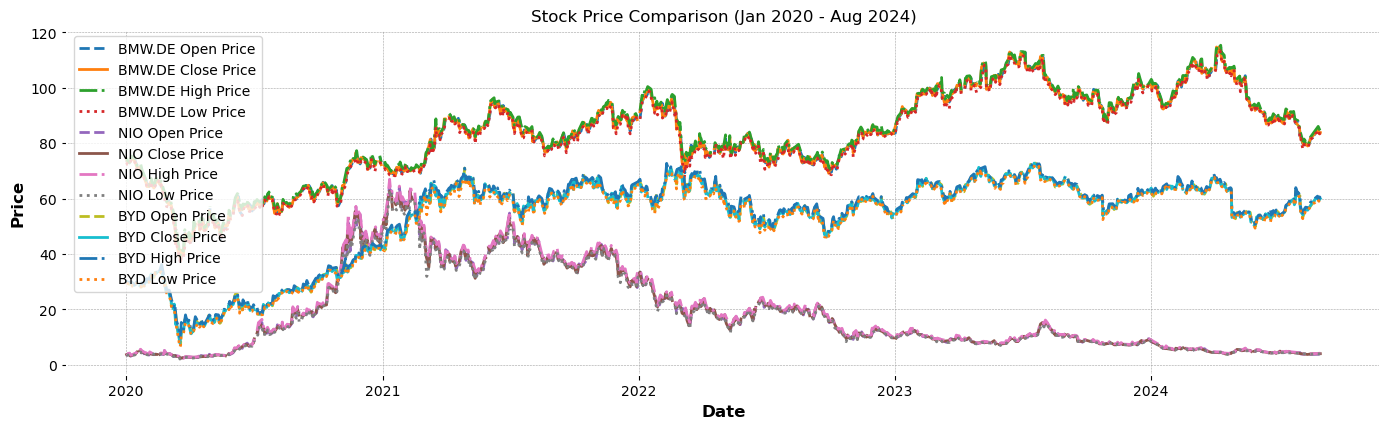

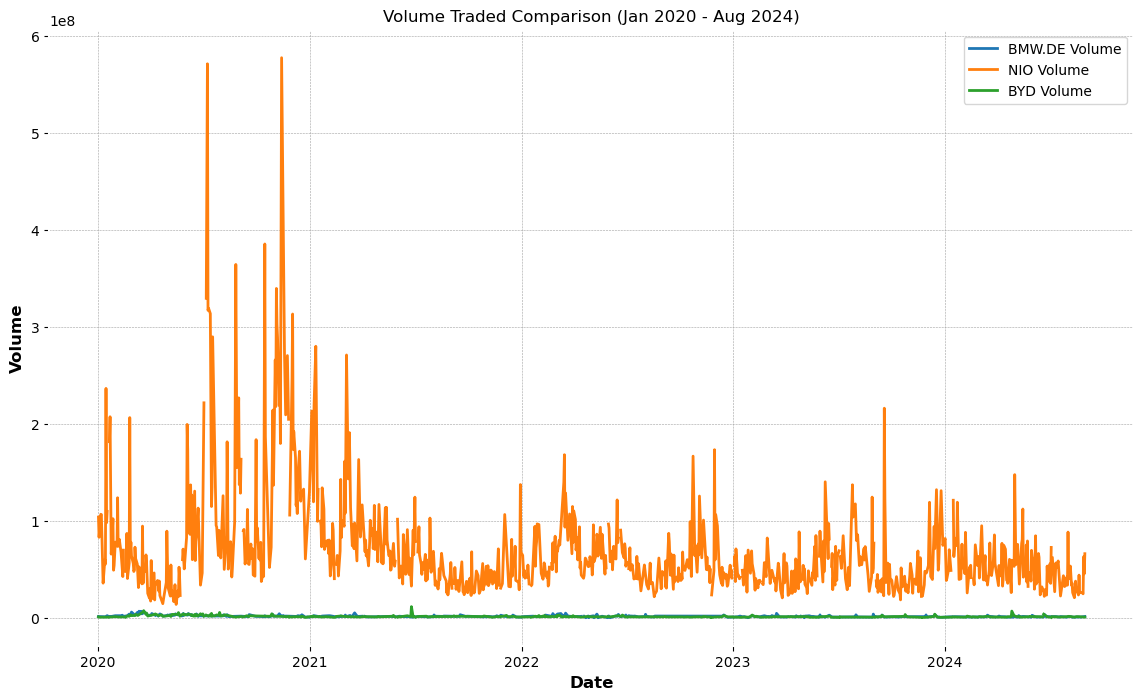

In [29]:
tickers = ['BMW.DE', 'NIO', 'BYD', ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--') 
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')  
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')  
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')  
    
plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Loop through each ticker and plot trading volume
for ticker in tickers:
    plt.plot(data['Volume'][ticker], label=f'{ticker} Volume')

# Set the title and axis labels for the volume plot
plt.title('Volume Traded Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend() 
plt.show()

## 3) Extracting the adjusted close of Tesla, calculating mean, variance, skewness and kurtosis, and kernel density estimation

mean: 207.15619191684755
variance: 6424.920851196523
Skewness: -0.3523890114901509
Kurtosis: -0.04946939044845289


Text(0.5, 0, 'Adjusted Close Price (USD)')

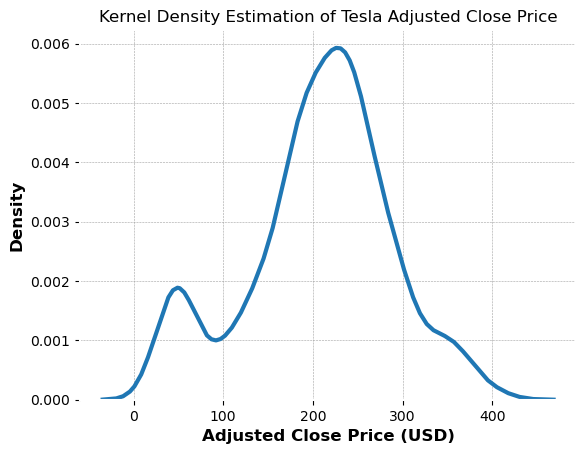

In [35]:
# extract the adjusted close column from the datasets
adjusted_close = tesla['Adj Close'].dropna()

# calculate the mean, variance, skewness, and kurtosis of the adjusted close column
mean_adj_close = np.mean(adjusted_close)
variance_adj_close = np.var(adjusted_close)
skewness_adj_close = ss.skew(adjusted_close)
kurtosis_adj_close = ss.kurtosis(adjusted_close)

#Display the values:
print("mean:", mean_adj_close)
print("variance:",variance_adj_close)
print("Skewness:", skewness_adj_close)
print("Kurtosis:", kurtosis_adj_close)
sns.kdeplot(data=adjusted_close,linewidth=3)
plt.title('Kernel Density Estimation of Tesla Adjusted Close Price')
plt.xlabel('Adjusted Close Price (USD)')

## 4) Mixture Modeling

### MM technique to approximate the empirical distribution using normal distributions as the component distribution

sample mean: $207.15619191684755
sample standard deviation: $80.15560399121526


/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_70665/4017287530.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r[t] = r1*(u <= p)+r2*(u > p)


<Figure size 1000x600 with 0 Axes>

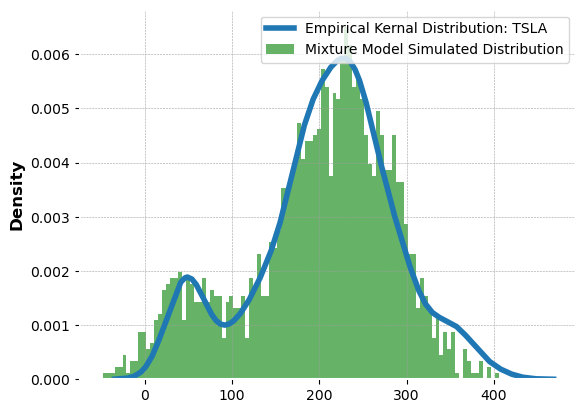

In [125]:
tesla['Adj Close'].describe() # summary statistics
X = tesla['Adj Close'].values
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")


# Given parameters
mu_1 = 45
sigma1 = 35
mu_2 = 225
sigma2 = 59
p = 0.15
T = 2000

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0,1,1)
    eps2 = np.random.normal(0,1,1)
    r1 = mu_1 + sigma1 * eps1
    r2 = mu_2 + sigma2 * eps2
    u = np.random.uniform(0,1,1)
    r[t] = r1*(u <= p)+r2*(u > p)

# Plotting the histogram of r
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
ax.legend([f'Empirical Kernal Distribution: {'TSLA'}', 'Mixture Model Simulated Distribution'])

### Bootstrap analysis to find 95% ci of the mean estimates

In [133]:
T= X.shape[0]
B = 1000 # 5000, 100000 [250 9750]
mu_boot = np.zeros(B)
se_boot = np.zeros(B)
x_boot_std = np.zeros(B)
for i in range(0, B):
     x_boot = X[np.random.choice(T,T)]
     mu_boot[i] = np.mean(x_boot)
     se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
     x_boot_std[i] = np.std(x_boot) # std of x_boot
     # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
mu_boot = np.sort(mu_boot)
se_boot = np.sort(se_boot)
xboot_std = np.sort(x_boot_std)
print("Statistics about the Mean")
print("95% confidence interval of mu_boot:", mu_boot[25], mu_boot[975])
print("95% confidence interval of std_boot of mu :", se_boot[25], se_boot[975])
print("\n")
print("Statistics about the Sample")
print(f"95% confidence interval of {'TSLA'} stock price std (method 1):", se_boot[25]*np.sqrt(T), se_boot[975]*np.sqrt(T))
print(f"95% confidence interval of {'TSLA'} stock price std (method 2):", xboot_std[25], xboot_std[975])



Statistics about the Mean
95% confidence interval of mu_boot: 202.93178076638478 211.88759865346515
95% confidence interval of std_boot of mu : 2.2353514336713953 2.433970852632261


Statistics about the Sample
95% confidence interval of TSLA stock price std (method 1): 76.5913738066349 83.39680669460942
95% confidence interval of TSLA stock price std (method 2): 76.5913738066349 83.39680669460942


## Monte Carlo analysis

### Analysis to simulate 1000 paths using five key parameters to mimic the empirical distribution

[*********************100%***********************]  1 of 1 completed
/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_70665/1792093127.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulatedPrice[t] = p1*(u<p)+p2*(u>=p);


sample mean: $207.15619191684755
sample standard deviation: $80.15560399121526
confidence interval of mu_mc: 197.41657861359352 206.79388275783253


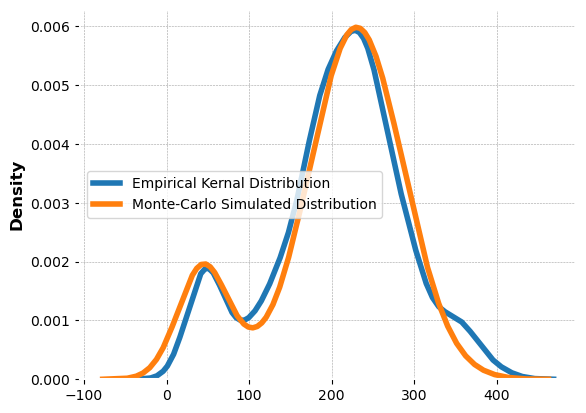

In [147]:
stock_symbol = "TSLA"
stocks = yf.download(stock_symbol,start_date ,end_date)
stocks['Adj Close'].describe() # summary statistics
X = stocks['Adj Close'].values
T = len(X) # number of trading days
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")

# observe kde plot and assign values to key parameters
mu_1 = 45 # mean of the first component distribution
sigma_1 = 23 # standard deviation of the first component distribution
mu_2 = 230 # mean of the second component distribution
sigma_2 = 53 # standard deviation of the second component distribution
p = 0.15

def generateEmpiricalDist(mu_1, sigma_1, mu_2, sigma_2, p, T):
    #Normal Mixture
    simulatedPrice = np.zeros(T-1);
    for t in range(0,T-1):
        p1 = mu_1 + sigma_1*np.random.normal(0,1,1);
        p2 = mu_2 + sigma_2*np.random.normal(0,1,1);
        u = np.random.uniform(0,1,1);
        simulatedPrice[t] = p1*(u<p)+p2*(u>=p);

    return simulatedPrice


T = X.shape[0]
M = 1000
mu_mc = np.zeros(M)
y_mc = 0
for i in range(0, M):
    simulatedPrice = generateEmpiricalDist(mu_1, sigma_1, mu_2, sigma_2, p, T)
    mu_mc[i] = np.mean(simulatedPrice)
    y_mc += np.sort(simulatedPrice)

y_mc = y_mc/M
mu_mc = np.sort(mu_mc)

print("confidence interval of mu_mc:", mu_mc[25], mu_mc[975])

# Visualization
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4) # the blue line
sns.kdeplot(data=y_mc, linewidth=4) # the orange line
ax.legend(['Empirical Kernal Distribution', 'Monte-Carlo Simulated Distribution'])

In [ ]:
#1111